# 추천시스템

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [140]:
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [141]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [142]:
df = pd.concat([df1,df2[df2['id'].isin(df1['movie_id'])]],axis=1)
df.drop('id',axis= 1,inplace = True)
df.head(1)

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [195]:
df1.columns=['id', 'title', 'cast', 'crew']
df=df2.merge(df1, on ='id')

In [196]:
c = df['vote_average'].mean()
c

6.092171559442016

In [197]:
m = df['vote_count'].quantile(0.9)
m # 영화 차트에 실리기 위한 최소 투표 수

1838.4000000000015

In [198]:
q_movies = df.loc[df['vote_count']>=m]
q_movies.shape

(481, 23)

In [199]:
def weighted_rating(x,m=m,c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R)+(m/(m+v)*c)

In [200]:
# for문 보다는 apply사용 권장
q_movies['score'] = q_movies.apply(weighted_rating, axis =1)
q_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669


In [201]:
q_movies = q_movies.sort_values('score',ascending = False)
q_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,44912,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,"[{""name"": ""De Line Pictures"", ""id"": 2609}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,Green Lantern,"[{""cast_id"": 6, ""character"": ""Hal Jordan / Gre...","[{""credit_id"": ""52fe46a3c3a36847f8109f09"", ""de...",5.521697
337,92000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.diehardmovie.com/,47964,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 591, ""nam...",en,A Good Day to Die Hard,"Iconoclastic, take-no-prisoners cop John McCla...",65.402595,"[{""name"": ""In

In [202]:
pop = df.sort_values('popularity',ascending = False)

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [204]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [205]:
df['overview'] = df['overview'].fillna('')

In [206]:
df['overview'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


In [207]:
tfidf_mat = tfidf.fit_transform(df['overview'])
tfidf_mat.shape # (4803,20978) 단어 -> 차원축소 (pca, svd 등) # 4803,10 -> (+정보)코사인 유사도

(4803, 20978)

In [208]:
from sklearn.metrics.pairwise import linear_kernel

In [209]:
cos_sim = linear_kernel(tfidf_mat,tfidf_mat)

In [210]:
cos_sim.shape

(4803, 4803)

In [211]:
cos_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [212]:
indices = pd.Series(df.index,index=df['title_x'])
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [213]:
def get_recommendations(title, cosine_sim = cos_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    m_indices = [i[0] for i in sim_scores]
    return df['title_x'].iloc[m_indices]

In [214]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [215]:
df[['cast','crew','keywords','genres']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cast      4803 non-null   object
 1   crew      4803 non-null   object
 2   keywords  4803 non-null   object
 3   genres    4803 non-null   object
dtypes: object(4)
memory usage: 187.6+ KB


In [216]:
for f in ['cast','crew','keywords','genres']:
    df[f] = df[f].apply(eval)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [217]:
from ast import literal_eval

In [222]:
# job이 Director에 해당되는 사람의 이름을 출력
def get_Director(data):
    for i in data:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [224]:
df['Director'] = df['crew'].apply(get_Director)

In [226]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,Director
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron


* PCA? 데이터의 공분산 행렬 -> 고유값 분해 -> 고유백터의 데이터를 선형 변환
* 고유 벡터 : pca의 주성분 벡터, 입력 데이터의 분산이 가장 큰 방향
* 고유값 : 고유 벡터의 크기, 데이터 분산 
1. 원본 데이터의 공분산 행렬
2. 공분산 행렬의 고윳값과 고유벡터를 구함
3. 고유값이 가장 큰 고유벡터를 추출 (축소하고자 하는 차원의 수만큼)
4. 고유값이 가장 큰 고유벡터를 이용하여 원본 데이터를 변환한다 (차원 축소한다)

In [228]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = columns)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [230]:
import matplotlib.pyplot as plt

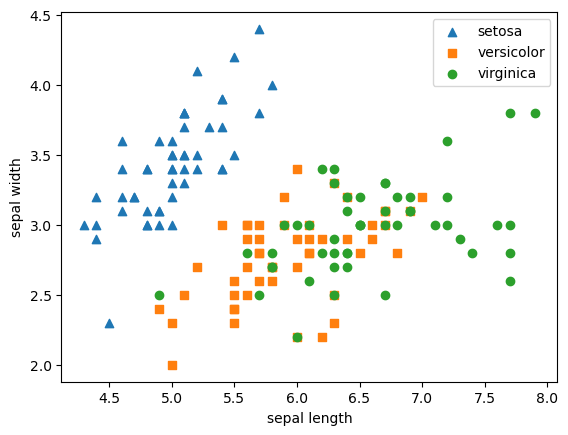

In [231]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [234]:
from sklearn.preprocessing import StandardScaler

iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [235]:
iris_f_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# PCA(주성분 분석) 알고리즘

In [247]:
from sklearn.decomposition import PCA

In [237]:
pca = PCA(n_components=2)

In [238]:
pca.fit(iris_f_scaled) 

PCA(n_components=2)

In [240]:
iris_pca = pca.transform(iris_f_scaled) # 4차원 -> 2차원으로 차원 축소

In [241]:
iris_pca.shape

(150, 2)

In [242]:
iris_f_scaled.shape

(150, 4)

In [244]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [245]:
iris_f_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [246]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [248]:
pca_columns=['pca_component_1','pca_component_2']

In [249]:
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

In [250]:
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


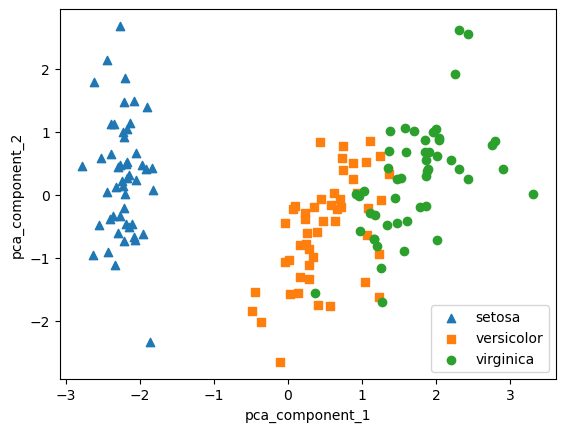

In [251]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [253]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


In [255]:
scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df_pca.target, scoring = "accuracy", cv = 3)

print(f"PCA 데이터 fold별 정확도: {scores}")
print(f"PCA 데이터 평균 정확도: {np.mean(scores):.4f}")

PCA 데이터 fold별 정확도: [0.88 0.88 0.88]
PCA 데이터 평균 정확도: 0.8800


In [259]:
scores = cross_val_score(rcf, iris_df.iloc[:,:2], iris_df.target, scoring = "accuracy", cv = 3)

print(f"sepal width, sepal length 데이터 fold별 정확도: {scores}")
print(f"sepal width, sepal length 데이터 평균 정확도: {np.mean(scores):.4f}")

sepal width, sepal length 데이터 fold별 정확도: [0.72 0.76 0.68]
sepal width, sepal length 데이터 평균 정확도: 0.7200


# SVD

In [265]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
apyori                        1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  

In [9]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [11]:
import surprise

In [2]:
# conda install -c conda-forge scikit-surprise

In [12]:
from surprise import Dataset
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')
trainset,testset = train_test_split(data,test_size = 0.25, random_state = 0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\user/.surprise_data/ml-100k


In [13]:
import numpy as np
import pandas as pd
import random
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import GridSearchCV

In [14]:
np.random.seed(20231030)

In [15]:
ratings_data = pd.read_csv('ratings.csv')

In [16]:
reader = Reader(rating_scale = (1,5))

In [17]:
data = Dataset.load_from_df(ratings_data[['user_id','book_id','rating']],reader)

In [18]:
raw_ratings = data.raw_ratings
raw_ratings

[(314, 1, 5.0, None),
 (439, 1, 3.0, None),
 (588, 1, 5.0, None),
 (1169, 1, 4.0, None),
 (1185, 1, 4.0, None),
 (2077, 1, 4.0, None),
 (2487, 1, 4.0, None),
 (2900, 1, 5.0, None),
 (3662, 1, 4.0, None),
 (3922, 1, 5.0, None),
 (5379, 1, 5.0, None),
 (5461, 1, 3.0, None),
 (5885, 1, 5.0, None),
 (6630, 1, 5.0, None),
 (7563, 1, 3.0, None),
 (9246, 1, 1.0, None),
 (10140, 1, 4.0, None),
 (10146, 1, 5.0, None),
 (10246, 1, 4.0, None),
 (10335, 1, 4.0, None),
 (10610, 1, 5.0, None),
 (10944, 1, 5.0, None),
 (11854, 1, 4.0, None),
 (11927, 1, 4.0, None),
 (12471, 1, 5.0, None),
 (13282, 1, 5.0, None),
 (13544, 1, 5.0, None),
 (15494, 1, 5.0, None),
 (16377, 1, 4.0, None),
 (16913, 1, 5.0, None),
 (17434, 1, 5.0, None),
 (17663, 1, 5.0, None),
 (17984, 1, 5.0, None),
 (18031, 1, 5.0, None),
 (18313, 1, 5.0, None),
 (18361, 1, 4.0, None),
 (20076, 1, 3.0, None),
 (20467, 1, 3.0, None),
 (20848, 1, 5.0, None),
 (21228, 1, 5.0, None),
 (21487, 1, 4.0, None),
 (21713, 1, 5.0, None),
 (22602, 1,

In [19]:
len(raw_ratings)

981756

In [20]:
random.shuffle(raw_ratings)
raw_ratings

[(7563, 22, 3.0, None),
 (40820, 3459, 3.0, None),
 (11572, 9597, 5.0, None),
 (10111, 8735, 5.0, None),
 (19442, 3928, 4.0, None),
 (34831, 6409, 5.0, None),
 (21722, 8962, 5.0, None),
 (36848, 8696, 5.0, None),
 (50795, 5503, 3.0, None),
 (23408, 8790, 4.0, None),
 (53183, 3004, 4.0, None),
 (9946, 7826, 4.0, None),
 (20924, 9503, 4.0, None),
 (26044, 9144, 4.0, None),
 (21055, 4682, 5.0, None),
 (19814, 9531, 5.0, None),
 (26579, 534, 3.0, None),
 (4302, 2135, 4.0, None),
 (5672, 9234, 5.0, None),
 (16275, 2197, 4.0, None),
 (31001, 103, 5.0, None),
 (488, 4331, 5.0, None),
 (20061, 2191, 2.0, None),
 (16613, 6859, 4.0, None),
 (11942, 5596, 4.0, None),
 (19998, 5368, 3.0, None),
 (27834, 646, 5.0, None),
 (14480, 6093, 3.0, None),
 (20026, 3038, 4.0, None),
 (9187, 8723, 2.0, None),
 (42772, 8662, 5.0, None),
 (8641, 556, 3.0, None),
 (41240, 333, 5.0, None),
 (14136, 1021, 3.0, None),
 (47942, 1723, 4.0, None),
 (18313, 42, 4.0, None),
 (34235, 6243, 5.0, None),
 (44047, 1609, 4.0

In [21]:
int(0.9*len(raw_ratings))

883580

In [22]:
train_test_split_index = int(0.9*len(raw_ratings))

In [23]:
raw_ratings_train = raw_ratings[:train_test_split_index]
raw_ratings_test = raw_ratings[train_test_split_index:]

In [24]:
# data변수에 담긴 train 데이터로 훈련
data.raw_ratings = raw_ratings_train

In [25]:
# test 데이터셋 구성
test = data.construct_testset(raw_ratings_test)

In [26]:
param_grid = {
    "n_factors": [70, 55],
    "n_epochs": [20 , 30], 
    "lr_all": [0.005, 0.025, 0.125],
    "reg_all": [0.08, 0.16, 0.32],  
    "random_state": [0],
}

In [31]:
grid_search.best_params

{'rmse': {'n_factors': 70,
  'n_epochs': 30,
  'lr_all': 0.025,
  'reg_all': 0.16,
  'random_state': 0},
 'mae': {'n_factors': 70,
  'n_epochs': 30,
  'lr_all': 0.025,
  'reg_all': 0.16,
  'random_state': 0}}

In [29]:
grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

In [30]:
grid_search.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.7min finished


In [32]:
best_model = grid_search.best_estimator['rmse']

In [33]:
best_model.predict(uid = 100, iid = 1000)

Prediction(uid=100, iid=1000, r_ui=None, est=4.109484159027994, details={'was_impossible': False})

In [34]:
testset_predictions = best_model.test(test)
accuracy.rmse(testset_predictions)

RMSE: 0.8238


0.8237720635033126

In [35]:
testset_predictions

[Prediction(uid=12274, iid=5734, r_ui=4.0, est=3.8796274216316182, details={'was_impossible': False}),
 Prediction(uid=22908, iid=8580, r_ui=5.0, est=3.9059437739329175, details={'was_impossible': False}),
 Prediction(uid=26869, iid=5534, r_ui=3.0, est=2.7817918652510687, details={'was_impossible': False}),
 Prediction(uid=4128, iid=7177, r_ui=5.0, est=3.762712849515032, details={'was_impossible': False}),
 Prediction(uid=36565, iid=7622, r_ui=3.0, est=3.7488662125421706, details={'was_impossible': False}),
 Prediction(uid=5467, iid=9139, r_ui=4.0, est=4.449082808355604, details={'was_impossible': False}),
 Prediction(uid=30944, iid=7, r_ui=5.0, est=4.295873895734154, details={'was_impossible': False}),
 Prediction(uid=20994, iid=6115, r_ui=3.0, est=3.310227774252662, details={'was_impossible': False}),
 Prediction(uid=1526, iid=3535, r_ui=4.0, est=3.9747365823444496, details={'was_impossible': False}),
 Prediction(uid=33051, iid=8443, r_ui=2.0, est=3.341078912688305, details={'was_imp

In [36]:
data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

In [37]:
data.raw_ratings[:10] # 사용자id, 상품id, 평점, 시간

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [38]:
len(data.raw_ratings) # 100000건

100000

In [39]:
df = pd.read_csv('ml-100k.zip')
df.head()
# df가 사용자id, 상품 id, 평점, 시간 순서

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [40]:
reader = Reader(rating_scale = (1,5))

In [42]:
df.columns
df = df[['user_id','item_id','rating']]

In [43]:
data = Dataset.load_from_df(df,reader)

In [44]:
from surprise.model_selection import train_test_split

In [55]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [56]:
svd = SVD()
svd.fit(trainset)

In [57]:
pred=svd.test(testset)

In [58]:
pred[1]

Prediction(uid=371, iid=210, r_ui=4.0, est=4.356110839780174, details={'was_impossible': False})

In [59]:
testset

[(907, 143, 5.0),
 (371, 210, 4.0),
 (218, 42, 4.0),
 (829, 170, 4.0),
 (733, 277, 1.0),
 (363, 1512, 1.0),
 (193, 487, 5.0),
 (808, 313, 5.0),
 (557, 682, 2.0),
 (774, 196, 3.0),
 (638, 118, 3.0),
 (632, 81, 5.0),
 (417, 200, 4.0),
 (580, 471, 3.0),
 (640, 91, 4.0),
 (450, 328, 4.0),
 (596, 13, 2.0),
 (586, 467, 4.0),
 (653, 502, 2.0),
 (378, 517, 3.0),
 (405, 65, 1.0),
 (279, 399, 4.0),
 (327, 293, 3.0),
 (346, 276, 1.0),
 (59, 928, 4.0),
 (514, 22, 4.0),
 (807, 402, 5.0),
 (473, 327, 3.0),
 (342, 324, 1.0),
 (269, 136, 4.0),
 (654, 1, 4.0),
 (250, 28, 4.0),
 (282, 689, 2.0),
 (534, 619, 4.0),
 (194, 481, 3.0),
 (184, 118, 2.0),
 (291, 739, 3.0),
 (293, 31, 2.0),
 (943, 1028, 2.0),
 (65, 69, 3.0),
 (562, 135, 5.0),
 (466, 62, 3.0),
 (847, 317, 3.0),
 (650, 521, 3.0),
 (656, 326, 1.0),
 (366, 53, 5.0),
 (15, 280, 3.0),
 (474, 322, 4.0),
 (90, 905, 4.0),
 (503, 19, 5.0),
 (334, 1524, 4.0),
 (90, 632, 5.0),
 (406, 1118, 3.0),
 (899, 515, 3.0),
 (13, 339, 3.0),
 (430, 19, 5.0),
 (24, 729

In [60]:
from surprise import accuracy

In [61]:
accuracy.rmse(pred)

RMSE: 0.9373


0.9372802056560859

In [62]:
accuracy.mae(pred) # 절댓값

MAE:  0.7370


0.7370274620945876

In [70]:
svd.predict(371,210)           # 다른 의미로 해석함
svd.predict('371','210')       # 반드시 문자열
svd.predict(str(371),str(210)) 

Prediction(uid='371', iid='210', r_ui=None, est=3.5318875, details={'was_impossible': False})

In [71]:
svd.predict('371','1')

Prediction(uid='371', iid='1', r_ui=None, est=3.5318875, details={'was_impossible': False})